<a href="https://colab.research.google.com/github/Vic-pro-grama/1822-Almacenando-Datos-En-El-Navegador/blob/projectoInicial/ML_clasificacion_con_SKlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Clasificacion con SKLearn 

En este noteboock estemos desarrollando varios ejercicios para entender como funcionan algunos algoritmos de clasificacion

# Aula 1 : Instroduccion a la clasificacion

In [1]:
import pandas as pd


In [2]:
# features 1 =si y 0 = no 
# tiene el pelo largo?
# tiene la uñas afiladas 
# hace miau? 

Perro1 = [0,1,1]
Perro2 = [1,0,1]
Perro3 = [1,1,1]

Gato1 = [0,1,0]
Gato2 = [0,1,1]
Gato3 = [1,1,0]

x_train = [Perro1,Perro2,Perro3,Gato1,Gato2,Gato3,]
y_train = [1,1,1,0,0,0]




In [3]:
from sklearn.svm import LinearSVC

model = LinearSVC()
model.fit(x_train,y_train)
LinearSVC()


LinearSVC()

In [4]:
animal_misterioso = [1,1,1]
model.predict([animal_misterioso])

array([1])

In [5]:
misterio1 = [1,1,1]
misterio2 = [1,1,0]
misterio3 = [0,1,1]

x_test = [misterio1,misterio2,misterio3]
y_test = [0,1,1]


In [6]:
 previsiones = model.predict(x_test)


In [7]:
correctos = (previsiones == y_test).sum()
total = len(x_test)
tasa_de_acierto = correctos/total
print(f'la tasa de acierto fue de:{round(tasa_de_acierto*100,2)}%')


la tasa de acierto fue de:33.33%


In [8]:
from sklearn.metrics import accuracy_score

tasa_de_acierto = accuracy_score(y_test,previsiones)
print(f'la tasa de acierto fue de:{round(tasa_de_acierto*100,2)}%')

la tasa de acierto fue de:33.33%


# Pruebas replicables, estractificacion, lectura de datos en internet


In [9]:
uri = 'https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv'
datos = pd.read_csv(uri)
datos.sample(5)


,home,how_it_works,contact,bought
86,1,1,0,0
42,0,1,0,0
29,0,0,1,0
10,1,1,0,1
34,1,0,1,1


In [12]:
mapa = {
          "home":"principal",
          "how_it_works":"como_funciona",
          "contact":"contoacto",
          "bought":"compro"
}
datos = datos.rename(columns=mapa)
datos.sample(5)


,principal,como_funciona,contoacto,compro
8,1,1,0,0
23,0,1,0,0
76,0,0,1,0
98,0,0,0,0
58,1,0,1,1


In [13]:
x = datos[['principal','como_funciona','contoacto']]
y = datos.compro

In [14]:
x_train = x[:75]
y_train = y[:75]
x_test = x[75:]
y_test = y[75:]

In [15]:
print(f"Enteenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")

Enteenaremos con 75 elementos y probaremos con 24 elementos


In [16]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model = LinearSVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test,previsiones)
print(f'la tasa de acierto fue de:{round(tasa_de_acierto*100,2)}%')

la tasa de acierto fue de:95.83%


In [20]:
from sklearn.model_selection import train_test_split
SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'la tasa de acierto fue de:{round(tasa_de_acierto*100,2)}%')



la tasa de acierto fue de:96.0%


In [21]:
from sklearn.model_selection import train_test_split
SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=SEED,stratify=y)

model = LinearSVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'la tasa de acierto fue de:{round(tasa_de_acierto*100,2)}%')

la tasa de acierto fue de:96.0%


In [22]:
y_train.value_counts()

0    49
1    25
Name: compro, dtype: int64

In [23]:
25/74

0.33783783783783783

In [24]:
y_test.value_counts()


0    17
1     8
Name: compro, dtype: int64

In [26]:
8/25


0.32

# Aula 3 proyecto de baja dimencionalidad y Baseline


In [27]:
uri = 'https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'
datos = pd.read_csv(uri)
datos.sample(5)

,unfinished,expected_hours,price
288,1,48,410
228,1,58,1334
920,1,18,202
1796,0,86,11029
1585,0,75,7221


In [31]:
mapa = {
        'unfinished':"no_finalizado",
        'expected_hours':"horas_esperadas",	
        'price':"precio"
    }
datos =datos.rename(columns=mapa)
datos.sample(5)

,no_finalizado,horas_esperadas,precio
97,1,81,6071
1541,0,90,14929
1643,0,83,12087
1453,0,68,4541
2111,0,91,14813


In [32]:
cambio = {1:0,0:1}
datos['finalizado'] = datos.no_finalizado.map(cambio)
datos.sample(5)

,no_finalizado,horas_esperadas,precio,finalizado
2097,0,77,7995,1
1926,0,24,217,1
777,1,93,8221,0
1788,0,27,278,1
1997,0,94,20954,1


In [33]:
import seaborn as sns

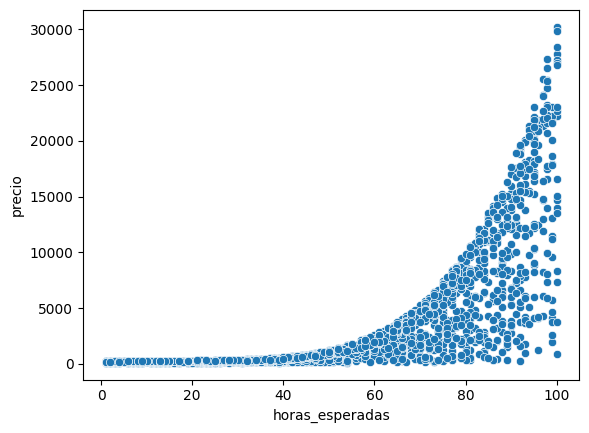

In [36]:
sns.scatterplot(x='horas_esperadas', y='precio',data=datos);

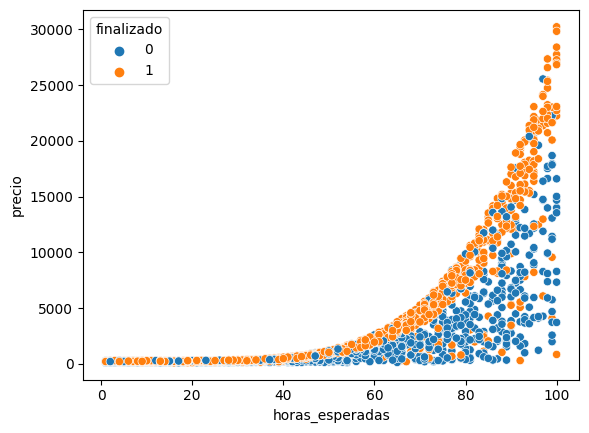

In [37]:
sns.scatterplot(x='horas_esperadas', y='precio',hue = 'finalizado', data=datos);

In [38]:
import numpy as np

x=datos[['horas_esperadas','precio']]
y=datos.finalizado

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Enteenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos")
model = LinearSVC()
model.fit(x_train,y_train)
previsiones = model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'la tasa de acierto fue de:{round(tasa_de_acierto*100,2)}%')

Enteenaremos con 1617 elementos y probaremos con 540 elementos
la tasa de acierto fue de:57.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [40]:
base_previsiones = np.ones(540)
tasa_de_acierto = accuracy_score(y_test, base_previsiones)
print(f'la tasa de acierto fue de:{round(tasa_de_acierto*100,2)}%')

la tasa de acierto fue de:52.59%


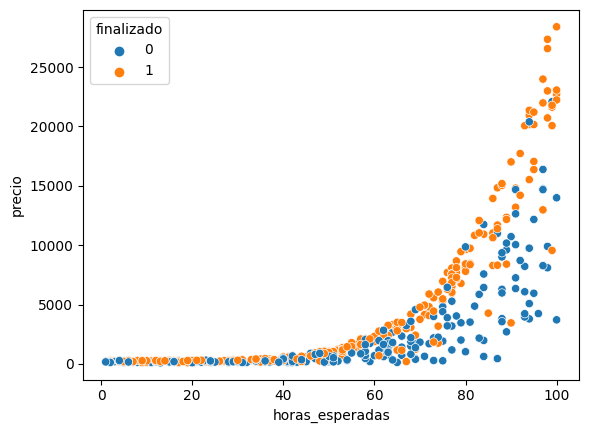

In [41]:
sns.scatterplot(x='horas_esperadas', y='precio', hue=y_test, data=x_test);

In [42]:
x_min = x_test.horas_esperadas.min()
x_max = x_test.horas_esperadas.max()
y_min = x_test.precio.min()
y_max = x_test.precio.max()

In [43]:
pixels = 100
eje_x = np.arange(x_min, x_max, (x_max-x_min)/pixels)
eje_y = np.arange(y_min, y_max, (y_max-y_min)/pixels)

In [44]:
xx,yy =np.meshgrid(eje_x,eje_y)
puntos = np.c_[xx.ravel(), yy.ravel()]
puntos


array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [46]:
z = model.predict(puntos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [48]:
z = z.reshape(xx.shape)
z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

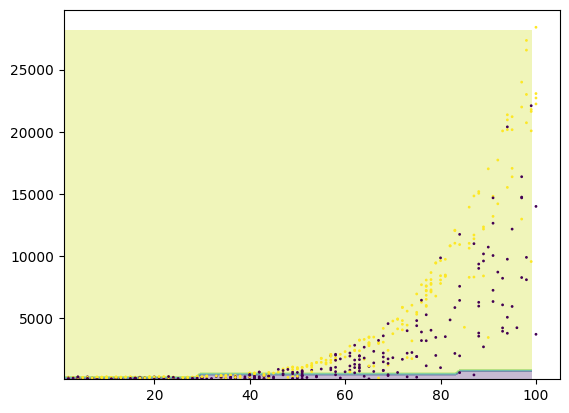

In [49]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, z, alpha=0.3)
plt.scatter(x_test.horas_esperadas, x_test.precio, c=y_test, s= 1)